# NetFlix New Zealand vs NetFlix USA Library Comparisons #

During June 2015 NZRS logged into Netflix from within New Zealand and the USA and observed the content that was avaiable.  From each page the titles offered by the service geographically were extracted and stored.

Each title was compared against the OMDd API (http://www.omdbapi.com/) an alternative interace to the Internet Movide Database (IMDd) data.  This allowed each title to be compared against data held within IMDb and the title data to be augmented.

This included the following:

* Plot
* Poster
* Rated
* Language
* Title
* Country
* Writer
* Metascore
* imdbRating
* Director
* Released
* Actors
* Year
* Genre
* Awards
* Runtime
* Type
* Response
* imdbVotes
* imdbID

The data was compiled and the serialised outputs saved for further analysis.  The data can be found here.[[[link to pickles]]]]  This was done using the Python pickle module.

A Python module was created to help with analysis and is available on Github (https://github.com/NZRS/content-analysis/blob/master/content_stats.py).

The analysis focussed on titles, so does not at present identify if the title is a movies or a series.  This may be able to be ascertianed from the OMDB 'Type', though this still does not give number of episodes, nor how many episodes  are on Netflix.  Qualitively Netflix NZ is missing the lasest series of Doctor Who as well as series from the 'classic Who'.


In [1]:
%matplotlib inline
import pickle
import plotly.plotly as py
from plotly.graph_objs import *
# module from NZRS
import content_stats
from IPython.core.display import Image
from urllib2 import quote
from IPython.display import display
import plotly.tools as tls
from IPython.display import HTML


In [2]:
# load previously pickled dictionaries

nz_data = pickle.load(open('nz/all_movies_dict.p', 'rb'))
us_data = pickle.load(open('us/all_movies_dict.p', 'rb'))



For all charts we present; the data we use is available for exploration and reuse.  There is a 'Play with this data' link at the bottom right hand side of each chart.

If you are running these iPython notebooks yourself please note we are embedding the graphs rather than creating them.  You can uncomment the creation code and comment out the embed code if you are using the notebooks interactively.

## Library Size ##
The simplest test we can carry out is looking at library size.  We are looking at count of titles not count of discreet episodes or total viewing time.  Its not an unusfule test to begin to understand the libraries.

In [4]:
total_titles_nz = len(nz_data)
total_titles_us = len(us_data)

data = (
    [Bar( x = ['NZ', 'USA'],
          y = [total_titles_nz, total_titles_us],
            marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
        )]
    )

layout = Layout(
    title ='Netflix Library Comparison- USA vs NZ - June 2015',
    yaxis = YAxis(title = 'Count of Titles'),
    xaxis = XAxis(title = 'Geographic Service'),
    
    )     

fig = Figure(data=data, layout=layout)

# Run this to generate the plot.ly plot for yourself, once created we will embed it
# py.iplot(fig, filename = 'Netflix-Library-Comparison-June-2015')

# Run this to embed the plot after creation, this is necessary for rendering in Github in particular.

HTML('''<div>
    <a href="https://plot.ly/~gotofftherails/97/" title="Netflix Library Comparison- USA vs NZ - June 2015" style="display: block; text-align: center;"><img src="https://plot.ly/~gotofftherails/97.png" alt="Netflix Library Comparison- USA vs NZ - June 2015" style="max-width: 100%;"  onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="gotofftherails:97" src="https://plot.ly/embed.js" async></script>
</div>

<div>

<a href="https://plot.ly/~gotofftherails/97/">Link to interactive chart and data</a> 

</div>


'''
)


## Uniqueness of Content ##

Further up you would notice we imported a python module called 'content_stats'.  This lets us apply some more exploratory stats.

The uniqueness of content between libraries has been questioned by several people.  

In [17]:
# Number of titles are common
common = len(content_stats.Compare_regions(us_data, nz_data).common_titles())
print 'Titles in common between USA and NZ:', common


# Number of titles unique to us
unique_us = len(content_stats.Compare_regions(us_data, nz_data).unique_to_first())
print 'Titles Unique to the USA :', unique_us

# Number of titles unique to nz
unique_nz = len(content_stats.Compare_regions(nz_data, us_data).unique_to_first())
print 'Titles Unique to the NZ :', unique_nz


Titles in common between USA and NZ: 468
Titles Unique to the USA : 3860
Titles Unique to the NZ : 966


We can represent this graphically again.

In [51]:
trace1 = Bar(
        y=['Count of Title'],
        x=[unique_nz],
        name='Unique to NZ',
        orientation = 'h',
    
        marker = Marker(
            color = 'rgba(0, 0, 0, 0.6)'        )
    
        )

trace2 = Bar(
        y=['Count of Title'],
        x=[common],
        name='Common Between NZ and USA',
        orientation = 'h',
        marker = Marker(
            color = 'rgba(255, 20, 20, 0.6)' )
    
        )


trace3 = Bar(
        y = ['Count of Title'],
        x = [unique_us],
        name = 'Unique to USA',
        orientation = 'h',
    
        marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
    
        )


data = Data([trace1, trace2, trace3])
layout = Layout(
    barmode='stack')

fig = Figure(data=data, layout=layout)

# used to create
# py.iplot(fig, filename = 'Netflix-Library-Comparison-June-2015-Uniqueness of Content')

# used to embed
HTML('''<div>
    <a href="https://plot.ly/~gotofftherails/127/" target="_blank" title="Unique to NZ, Common Between NZ and USA, Unique to USA" style="display: block; text-align: center;"><img src="https://plot.ly/~gotofftherails/127.png" alt="Unique to NZ, Common Between NZ and USA, Unique to USA" style="max-width: 100%;"  onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="gotofftherails:127" src="https://plot.ly/embed.js" async></script>
</div>
''')

## Quality of Content ##

Quality by definition is qualitive. Though with enough measure of quality we can hopefully have some quantitive measure of quality, the same way we can hopefully say a five star hotel is normally going to better than a one star hotel.  We know this is not always the case and we do have the [Napoleon Dynamite](http://www.nytimes.com/2008/11/23/magazine/23Netflix-t.html?pagewanted=all&_r=0) effect where the hate and love for a title can be strong.  

To assess quality we looked looked towards IMDB, who make some of their data available via [alternative interfaces](http://www.imdb.com/interfaces) though not in a structured API.  Luckily [OMDB]('http://www.omdbapi.com/') offer a RESTful API that allows querying by title or ID, and returns XML or JSON.

We used this to query the title against OMDB.  Not all returned a useful response, Doctor Who fans will be pleased to know 1995's made for TV movie was not recognised when we queried.

We can look at what we did not get a response for, this is useful, it does not tell us where we got a false response, but we're hoping there were not too many of those.

In [20]:
# Count of titles we did not get a response for 
nz_no_response = len([k for (k, v) in nz_data.iteritems() if v['Response'] == 'False'])
print 'Count of NZ titles we did not get a reponse for: ', nz_no_response
print 'Percentage of NZ sites: ', round(float(nz_no_response)/float(len(nz_data))*100), '%'

#US count?


Count of NZ titles we did not get a reponse for:  163
Percentage of NZ sites:  11.0 %


We're pretty happy with these percentages for getting an understanding of the content that is available from a quality perpective.  We might not be able to be absolutely, absolute, but good enough.

We can now look at the difference in quality.

In our assessment of quality we are not looking at Netflix ratings, we are looking at the ratings held in IMDb.  It could be that Netflix have content more suited to its customers and they would rate titles higher.  Those rating IMDb may be skewed in a particular way as they may have more interest in esotric parts of movies.

We won't get this right but its still useful.

## Average Score ##

In [21]:
# Average IMDB score of NZ geographic content
nz_avg_score = content_stats.Title_stats(nz_data).average_score()

# Average IMDB score of NZ geographic content
us_avg_score = content_stats.Title_stats(us_data).average_score()

print 'NZ Average Score via OMDB: ', round(nz_avg_score,2)
print 'US Average Score via OMDB: ', round(us_avg_score,2)


NZ Average Score via OMDB:  6.68
US Average Score via OMDB:  6.37


New Zealand may have a smaller catalgoue but it does seem to have a marginally higher average quality than the US.  We can look at what the top movies are (based on IMDb/OMDb ratings) between the two countries.

##Top Movies##

In [27]:
top_nz_titles = content_stats.Title_stats(nz_data).top_movies(25)
top_us_titles = content_stats.Title_stats(us_data).top_movies(25)

print 'Top NZ Titles'
print

# Truncate to 5
for tup in top_nz_titles[:5]:
    print 'Title :', tup[0]
    print 'Rating: ', tup[1]
    print '========='

print
print 
print 'Top US Titles'
print
    
# Truncate to 5
for tup in top_us_titles[:5]:
    print 'Title :', tup[0]
    print 'Rating: ', tup[1]
    print '========='
    


Top NZ Titles

Title : The Shawshank Redemption
Rating:  9.3
Title : Human Planet
Rating:  9.3
Title : Frozen Planet
Rating:  9.3
Title : Firefly
Rating:  9.2
Title : The Godfather
Rating:  9.2


Top US Titles

Title : Generation Earth
Rating:  9.1
Title : Fullmetal Alchemist: Brotherhood
Rating:  9.1
Title : Long Way Round
Rating:  9.1
Title : Tomb Raider
Rating:  9.1
Title : Top Gear
Rating:  9.0


We could potentially display this visually.

We need to do some trickery as our dictionaries have quoted title names as the keys, so 'The%20Pink%20Panther' instead of 'The Pink Panther', so we need to 'quote' our moviename to get an image.

## Top NZ Title Visually ##

Title : The Shawshank Redemption
Title : 9.3


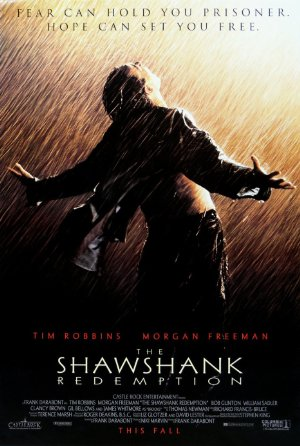

Title : Human Planet
Title : 9.3


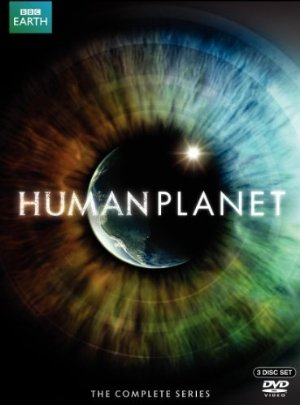

Title : Frozen Planet
Title : 9.3


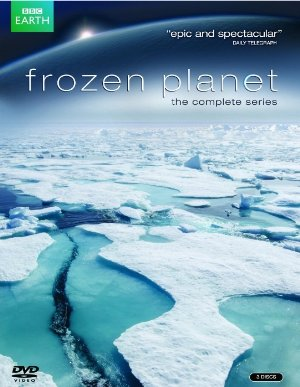

Title : Firefly
Title : 9.2


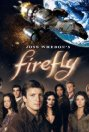

Title : The Godfather
Title : 9.2


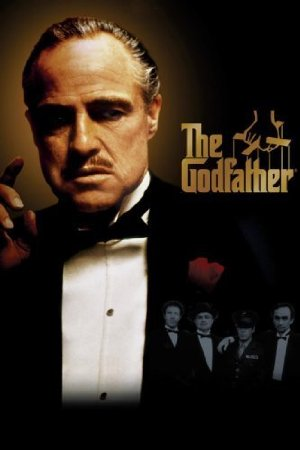

In [34]:
#truncate to top 5
for tup in top_nz_titles[:5]:
    print 'Title :', tup[0]
    print 'Title :', tup[1]
    try:
        poster = Image(nz_data[quote(tup[0])]['Poster'])
        display(poster)
    except:
        print '''
        |
        | No Poster
        |       
        '''


## New Zealand as Country of Origin ##

We can see what New Zealand content is represented within our samples. This includes anything that has the identifier New Zealand in 'Country' via IMDb.  This can include co-productions.

In [52]:
# test
nz_origin_nz = content_stats.Title_stats(nz_data).nz_origin()
nz_origin_us = content_stats.Title_stats(nz_data).nz_origin()


data = (
    [Bar( x = ['NZ', 'USA'],
          y = [nz_origin_nz, nz_origin_us],
            marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
        )]
    )

layout = Layout(
    title ='Netflix - Count of Titles with Country of Origin as New Zealand via IMDb',
    yaxis = YAxis(title = 'Count of Titles'),
    xaxis = XAxis(title = 'Geographic Service'),
    
    )     

fig = Figure(data=data, layout=layout)

# py.iplot(fig, filename = 'Netflix-Library-Comparison-Country-June-2015')

HTML('''<div>
    <a href="https://plot.ly/~gotofftherails/130/" target="_blank" title="Netflix - Count of Titles with Country of Origin as New Zealand via IMDb" style="display: block; text-align: center;"><img src="https://plot.ly/~gotofftherails/130.png" alt="Netflix - Count of Titles with Country of Origin as New Zealand via IMDb" style="max-width: 100%;"  onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="gotofftherails:130" src="https://plot.ly/embed.js" async></script>
</div>
''')

Neck and neck

## Age of Titles ##

We can look at age of titles within the catalogues.  There are some interesting bits to this as age is represented in three ways:
* A single year - this could be a movie that came out in a single year or a series that only ran within a single calendar year
* Across multiple years, for example a series that has run across multiple years (e.g. Friends, 1994–2004)
* Something that is still running (e.g. Orange is the New Black, 2013–)

Initially we could look at year of first release. 



In [53]:
release_year = content_stats.Title_stats(nz_data).year_first_release_count()

x_list = []
y_list = []

for year, count in release_year.iteritems():
    x_list.append(year)
    y_list.append(count)

data = (
    [Bar( x = x_list,
          y = y_list,
            marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
        )]
    )

layout = Layout(
    title ='Netflix - Year of Titles First Release - NZ June 2015',
    yaxis = YAxis(title = 'Count of Titles'),
    xaxis = XAxis(title = 'Year'),
    
    )     

fig = Figure(data=data, layout=layout)

#py.iplot(fig, filename = 'Netflix-Library-Comparison-Release-June-2015')

HTML('''<div>
    <a href="https://plot.ly/~gotofftherails/132/" target="_blank" title="Netflix - Year of Titles First Release - NZ June 2015" style="display: block; text-align: center;"><img src="https://plot.ly/~gotofftherails/132.png" alt="Netflix - Year of Titles First Release - NZ June 2015" style="max-width: 100%;"  onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="gotofftherails:132" src="https://plot.ly/embed.js" async></script>
</div>
''')


We can do the same for the USA catalogue.

In [54]:
release_year = content_stats.Title_stats(us_data).year_first_release_count()

x_list = []
y_list = []

for year, count in release_year.iteritems():
    x_list.append(year)
    y_list.append(count)

data = (
    [Bar( x = x_list,
          y = y_list,
            marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
        )]
    )

layout = Layout(
    title ='Netflix - Year of Titles First Release - US June 2015',
    yaxis = YAxis(title = 'Count of Titles'),
    xaxis = XAxis(title = 'Year'),
    
    )     

fig = Figure(data=data, layout=layout)

# py.iplot(fig, filename = 'Netflix-Library-Comparison-Release-US-June-2015')
HTML('''<div>
    <a href="https://plot.ly/~gotofftherails/142/" target="_blank" title="Netflix - Year of Titles First Release - US June 2015" style="display: block; text-align: center;"><img src="https://plot.ly/~gotofftherails/142.png" alt="Netflix - Year of Titles First Release - US June 2015" style="max-width: 100%;"  onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="gotofftherails:142" src="https://plot.ly/embed.js" async></script>
</div>
''')

But we can look at them side by side.  Lets look at absolute first.

In [55]:
release_year_us = content_stats.Title_stats(us_data).year_first_release_count()

us_x_list = []
us_y_list = []

for year, count in release_year_us.iteritems():
    us_x_list.append(year)
    us_y_list.append(count)

release_year_nz = content_stats.Title_stats(nz_data).year_first_release_count()

nz_x_list = []
nz_y_list = []

for year, count in release_year_nz.iteritems():
    nz_x_list.append(year)
    nz_y_list.append(count)

trace1 = (
    Bar( x = us_x_list,
          y = us_y_list,
        name = 'USA',
            marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
        )
    )

trace2 = (
    Bar( x = nz_x_list,
          y = nz_y_list,
        name = 'NZ',
            marker = Marker(
            color = 'rgba(255, 144, 33, 0.6)')
        )
    )

layout = Layout(
    title ='Netflix - Year of Titles First Release - US and NZ June 2015',
    yaxis = YAxis(title = 'Count of Titles'),
    xaxis = XAxis(title = 'Year'),
    barmode='group'
    
    )     

data = Data([trace1, trace2])

fig = Figure(data=data, layout=layout)

#py.iplot(fig, filename = 'Netflix-Library-Comparison-Release-US-NZ-June-2015')

HTML('''<div>
    <a href="https://plot.ly/~gotofftherails/157/" target="_blank" title="Netflix - Year of Titles First Release - US and NZ June 2015" style="display: block; text-align: center;"><img src="https://plot.ly/~gotofftherails/157.png" alt="Netflix - Year of Titles First Release - US and NZ June 2015" style="max-width: 100%;"  onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="gotofftherails:157" src="https://plot.ly/embed.js" async></script>
</div>
''')

The smaller New Zealand library makes this a bit tricker to understand which service has newer and older content

In [56]:
total_us_titles = sum(us_y_list)
us_y_list = [(float(count)/(float(total_us_titles)) * 100) for count in us_y_list]

total_nz_titles = sum(nz_y_list)
nz_y_list = [(float(count)/(float(total_nz_titles)) * 100) for count in nz_y_list]

trace1 = (
    Bar( x = us_x_list,
          y = us_y_list,
        name = 'USA',
            marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
        )
    )

trace2 = (
    Bar( x = nz_x_list,
          y = nz_y_list,
        name = 'NZ',
            marker = Marker(
            color = 'rgba(255, 144, 33, 0.6)')
        )
    )

layout = Layout(
    title ='Netflix - Year of Titles First Release - US and NZ June 2015 - Percentage',
    yaxis = YAxis(title = 'Percentage of Titles'),
    xaxis = XAxis(title = 'Year'),
    barmode='group'
    
    )     

data = Data([trace1, trace2])

fig = Figure(data=data, layout=layout)

# py.iplot(fig, filename = 'Netflix-Library-Comparison-Release-US-NZ-June-2015-relative')

HTML('''<div>
    <a href="https://plot.ly/~gotofftherails/159/" target="_blank" title="Netflix - Year of Titles First Release - US and NZ June 2015 - Percentage" style="display: block; text-align: center;"><img src="https://plot.ly/~gotofftherails/159.png" alt="Netflix - Year of Titles First Release - US and NZ June 2015 - Percentage" style="max-width: 100%;"  onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="gotofftherails:159" src="https://plot.ly/embed.js" async></script>
</div>
''')

## Languages ##